In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000

X, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state = 42

)

In [4]:
len(X)

1000

In [5]:
len(y)

1000

In [9]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [14]:
pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


from matplotlib import pyplot as plt
_df_0['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X2', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
X.dtype

dtype('float64')

In [19]:
y.dtype

dtype('int64')

In [25]:
X[0].shape, y[0].shape

((2,), ())

In [26]:
# Turn data into tensors

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
y = torch.from_numpy(y).type(torch.float32)

In [35]:
X.shape

torch.Size([1000, 2])

In [36]:
y.shape

torch.Size([1000])

In [41]:
X_train, X_test, y_train,y_test = train_test_split(
    X,y,test_size = 0.2, random_state =42
)

In [45]:
X_train.shape, X_test.shape
from torch import nn

In [44]:
# coding a small neural network to handle oyr classification model

In [54]:
import torch.nn as nn

class CircleModel(nn.Module):

    def __init__(self):
        super(CircleModel, self).__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_0 = CircleModel().to(device)
model_0


CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [57]:
# Making our neural network visuals

In [204]:
model_1 = nn.Sequential(
    nn.Linear(in_features =2 , out_features = 5),
    nn.ReLU(),

    nn.Linear(in_features = 5, out_features =10),
    nn.ReLU(),


    nn.Linear(in_features = 10, out_features =1  ),


).to(device)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)


In [205]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [206]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140],
                      [-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
                      [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
                      [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
                      [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410],
                      [ 0.1202, -0.1213,  0.1882,  0.3993,  0.2585],
                      [-0.1955,  0.2582,  0.0800,  0.2271, -0.2726],
                      [-0.4427, -0.1728, -0.3430,  0.3670,  0.1288],
                      [ 0.1852,  0.1414, -0.0078,  0.3500, -

In [207]:
torch.manual_seed(42)

epochs = 1000

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_0 = model_1.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate loss and accuracy

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()


  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                   y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc}| Test Loss: {test_loss:.2f} | Test Acc: {test_acc}")




Epoch: 0 | Loss: 0.70 Acc: 50.0| Test Loss: 0.70 | Test Acc: 50.0
Epoch: 10 | Loss: 0.69 Acc: 50.0| Test Loss: 0.69 | Test Acc: 50.0
Epoch: 20 | Loss: 0.69 Acc: 47.5| Test Loss: 0.69 | Test Acc: 47.0
Epoch: 30 | Loss: 0.69 Acc: 48.625| Test Loss: 0.69 | Test Acc: 52.0
Epoch: 40 | Loss: 0.69 Acc: 49.875| Test Loss: 0.69 | Test Acc: 50.5
Epoch: 50 | Loss: 0.69 Acc: 48.0| Test Loss: 0.69 | Test Acc: 49.5
Epoch: 60 | Loss: 0.69 Acc: 49.375| Test Loss: 0.69 | Test Acc: 52.5
Epoch: 70 | Loss: 0.69 Acc: 49.25| Test Loss: 0.69 | Test Acc: 53.5
Epoch: 80 | Loss: 0.69 Acc: 49.875| Test Loss: 0.69 | Test Acc: 54.0
Epoch: 90 | Loss: 0.69 Acc: 49.5| Test Loss: 0.69 | Test Acc: 55.00000000000001
Epoch: 100 | Loss: 0.69 Acc: 50.5| Test Loss: 0.69 | Test Acc: 55.00000000000001
Epoch: 110 | Loss: 0.69 Acc: 50.875| Test Loss: 0.69 | Test Acc: 55.00000000000001
Epoch: 120 | Loss: 0.69 Acc: 51.37500000000001| Test Loss: 0.69 | Test Acc: 55.50000000000001
Epoch: 130 | Loss: 0.69 Acc: 51.74999999999999| Tes

In [184]:
X_train.dtype

torch.float32

In [185]:
# make predictions and evaluate the model

In [186]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("Already exist")

else:
  print("Downloading the helper function")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)
# Download helper function

Already exist


In [187]:
from helper_function import plot_predictions, plot_decision_boundary

In [188]:
# plot decision boundary of our model

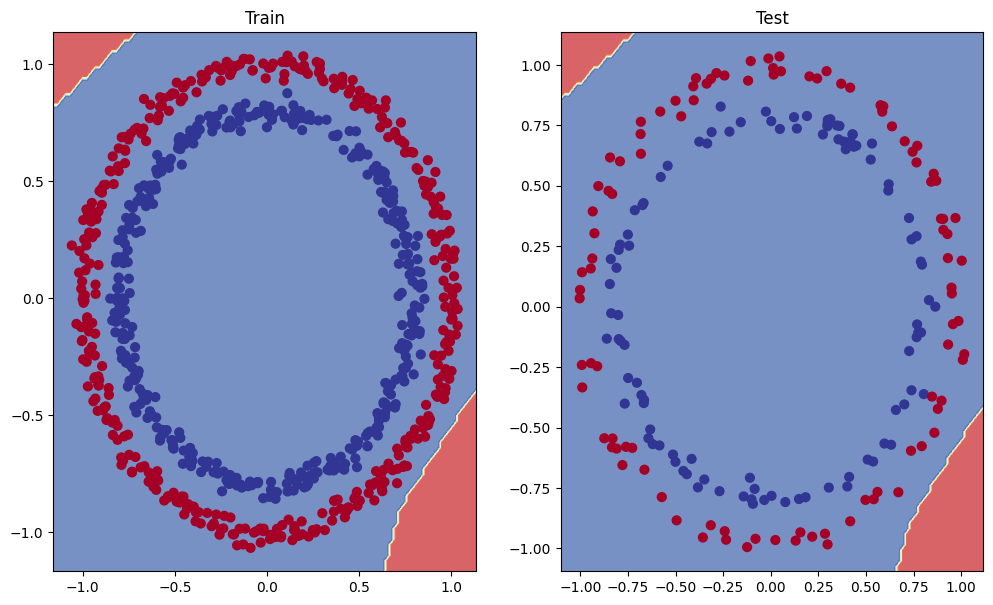

In [189]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train , y_train)
plt.subplot(1,2,2)

plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [190]:
# Improving a model performance:

# Add more Layers- give the model chances to learn about patterns in data
# Add more hidden layers - go from more hidden layers
# Fit for longer
# Change activation function
# Change the learning rate

